## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [6]:
df= pd.read_csv(r'D:\elsie\Data Science\archive\tips.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [21]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(numerical_columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['total_bill', 'tip', 'size']
['sex', 'smoker', 'day', 'time']


### 2. Compute the average bill amount for each day.

In [22]:
average_bill = df.groupby('day')['total_bill'].mean()
pd.DataFrame(average_bill)

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


### 3. Which gender is more generous in giving tips?

In [24]:
generous_gender = df.groupby('sex')['tip'].mean()
pd.DataFrame(generous_gender)

,tip
sex,
Female,2.833448
Male,3.089618


### 4. According to the data, were there more customers for dinner or lunch?

In [28]:
orders_by_time = df.groupby('time')['size'].count()
pd.DataFrame(orders_by_time)


,size
time,
Dinner,176
Lunch,68


### 5. Based on the statistical summary, comment on the variable 'tip'

In [30]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

1)All 244 customers are giving tip
2)On an average people are giving about 3 dollar

### 6. Find the busiest day in terms of the orders?

In [31]:
df.day.mode()

0    Sat
Name: day, dtype: object

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [36]:
df.total_bill.skew()

1.1332130376158205

Text(0.5, 1.0, 'Skeweness of total_bill variable')

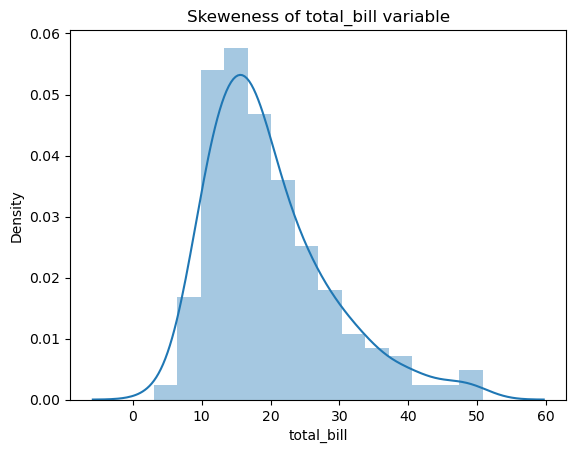

In [39]:
sns.distplot(df['total_bill'])
plt.title('Skeweness of total_bill variable')

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [43]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


1) Yes, the tip has positive Correlation with the bill amount

### 9. What is the percentage of males and females in the dataset? and display it in the plot

Text(0.5, 1.0, 'Percentage of male and female in the dataset')

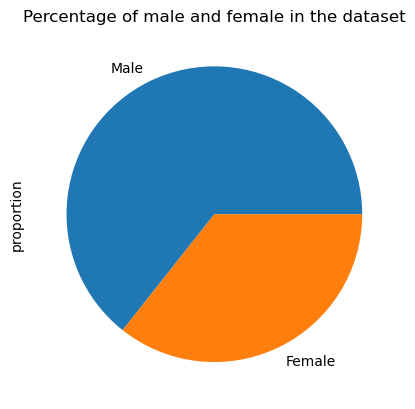

In [49]:
df['sex'].value_counts(normalize=True).plot(kind='pie')
plt.title('Percentage of male and female in the dataset')

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [55]:
gender_wise_smoker = df.groupby('sex')['smoker'].value_counts()
pd.DataFrame(gender_wise_smoker)


count
sex    smoker       
Female No         54
       Yes        33
Male   No         97
       Yes        60

Text(0.5, 1.0, 'Gender wise count based on smoking habits')

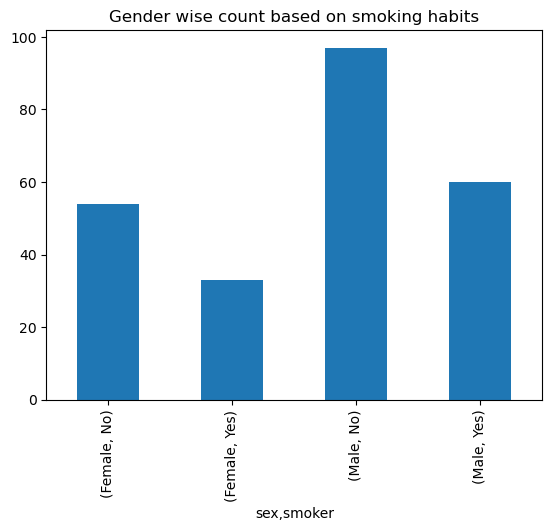

In [56]:
df.groupby('sex')['smoker'].value_counts().plot(kind='bar')
plt.title('Gender wise count based on smoking habits')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [58]:
Average_tip = df.groupby('day')['tip'].mean()
pd.DataFrame(Average_tip)

,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


<Axes: xlabel='day'>

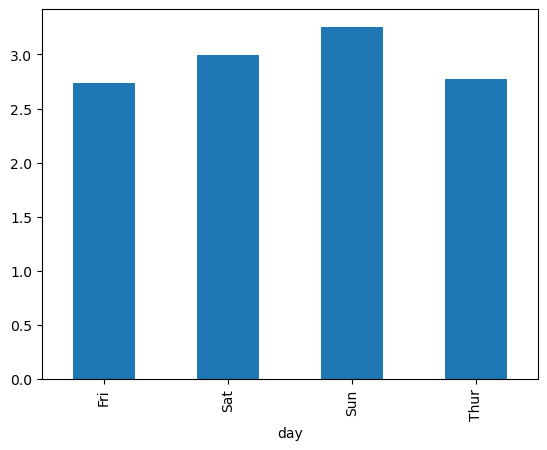

In [59]:
df.groupby('day')['tip'].mean().plot(kind='bar')

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [62]:
df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

Text(0.5, 1.0, 'Average bill vs Size of the group')

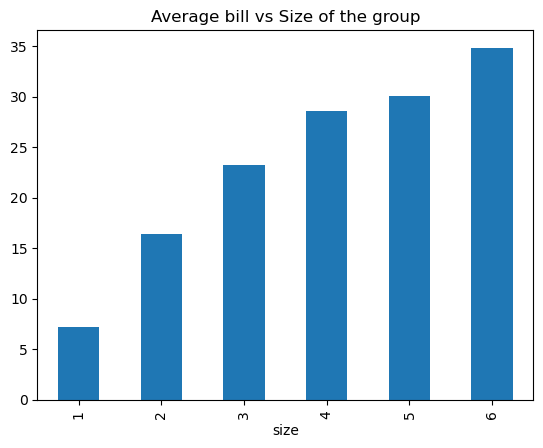

In [65]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.title('Average bill vs Size of the group')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<Axes: xlabel='total_bill', ylabel='sex'>

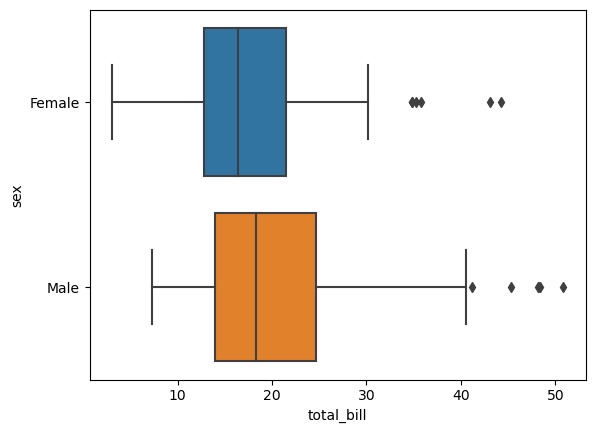

In [66]:
sns.boxplot(x='total_bill',y='sex', data=df)

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [68]:
max_amt_for_lunch_dinner = df.groupby(['time','day'])['total_bill'].max()
pd.DataFrame(max_amt_for_lunch_dinner)

total_bill
time   day             
Dinner Fri        40.17
       Sat        50.81
       Sun        48.17
       Thur       18.78
Lunch  Fri        16.27
       Thur       43.11

### 15. Compute the percentage of missing values in the dataset.

In [71]:
percentage_of_missing_value = df.isnull().sum()/len(df)*100
pd.DataFrame(percentage_of_missing_value)

,0
total_bill,0.0
tip,0.0
sex,0.0
smoker,0.0
day,0.0
time,0.0
size,0.0


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [72]:
df[df.duplicated]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

Text(0.5, 1.0, 'Outliers before transformation')

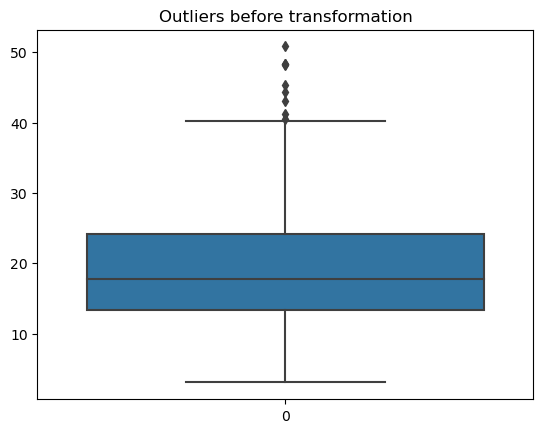

In [77]:
sns.boxplot(df['total_bill'])
plt.title('Outliers before transformation')

Text(0.5, 1.0, 'Outliers After Transformation')

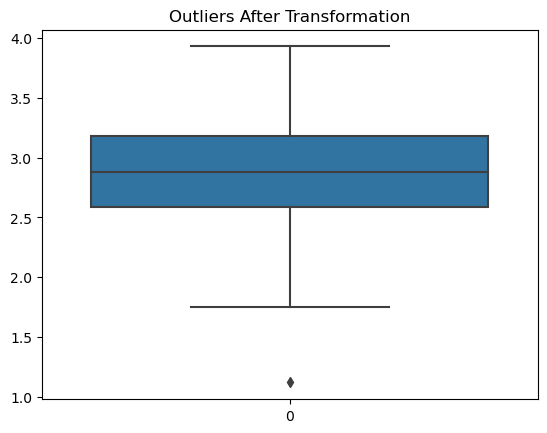

In [78]:
df['total_bill_trans'] = np.log(df['total_bill'])
sns.boxplot(df['total_bill_trans'])
plt.title('Outliers After Transformation')

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

Text(0.5, 1.0, 'Outliers Before using IQR Rechnique')

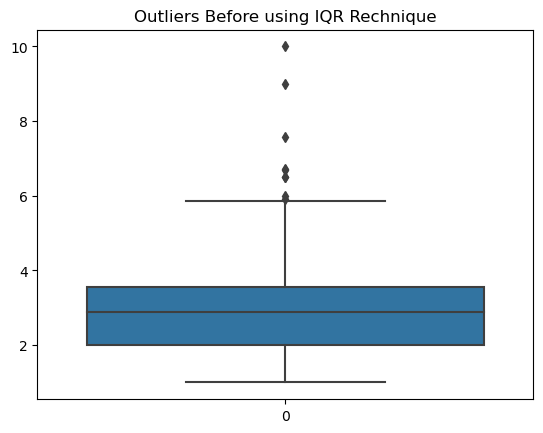

In [7]:
sns.boxplot(df['tip'])
plt.title('Outliers Before using IQR Rechnique')

Text(0.5, 1.0, 'Outliers After IQR Technique ')

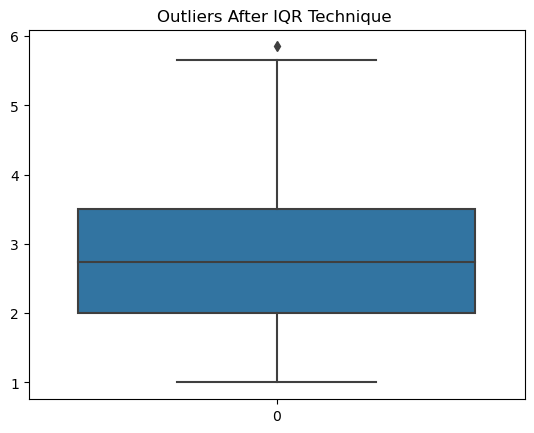

In [9]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - (1.5 * IQR)
higher_whisker = Q3 + (1.5 * IQR)
df_out = df.loc[(df['tip'] < higher_whisker) & (df['tip'] > lower_whisker)]
sns.boxplot(df_out['tip'])
plt.title('Outliers After IQR Technique ')

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [82]:
df.select_dtypes(include='object')


,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [83]:
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
53,9.94,1.56,2,2.296567,True,False,False,True,False,False
103,22.42,3.48,2,3.109953,False,True,True,False,False,False
70,12.02,1.97,2,2.486572,True,False,True,False,False,False
97,12.03,1.50,2,2.487404,True,True,False,False,False,False
49,18.04,3.00,2,2.892592,True,False,False,True,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [12]:
df['total_bill'].max()

50.81

In [13]:
df['total_bill'].min()

3.07

In [14]:
Range = df['total_bill'].max() - df['total_bill'].min()
print('Original Range of column: ', Range)

Original Range of column:  47.74


In [15]:
minmax = MinMaxScaler()
df['total_bill_mm'] = minmax.fit_transform(df[['total_bill']])
mm_range = df['total_bill_mm'].max() -  df['total_bill_mm'].min()
print('Transformed Range of column: ', mm_range)

Transformed Range of column:  0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [16]:
tips_df = pd.read_csv(r'D:\elsie\Data Science\archive\tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
tips_df = pd.get_dummies(tips_df, drop_first=True)
tips_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [20]:
X = tips_df.drop('tip', axis=1)
print(X.head(2))
y = tips_df['tip']
print(y.head(2))

   total_bill  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0       16.99     2     False       False    False     True     False   
1       10.34     3      True       False    False     True     False   

   time_Lunch  
0       False  
1       False  
0    1.01
1    1.66
Name: tip, dtype: float64


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
minmax = MinMaxScaler()
X_train.iloc[:,:2] =  minmax.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] =  minmax.fit_transform(X_test.iloc[:,:2])

In [22]:
X_train.iloc[:,:2].sample(5)

,total_bill,size
139,0.164447,0.2
169,0.108300,0.2
53,0.092987,0.2
186,0.336218,0.4
216,0.497115,0.8


In [23]:
X_test.iloc[:,:2].sample(5)

,total_bill,size
143,0.531707,1.0
127,0.253880,0.2
66,0.296674,0.2
154,0.370288,0.6
156,1.000000,1.0


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = model.predict(X_test)

In [29]:
print('r square value', r2_score(y_test, predictions))

r square value 0.25040964904616525


### Happy Learning:)